In [1]:
import pandas as pd 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("data/Zomatodata .csv")

# Rate cloumn fix  

In [4]:
def ratecolfix(v):
    v = str(v).split('/')
    v = v[0]
    return float(v)

In [5]:
df['rate']= df['rate'].apply(ratecolfix)

# "কাস্টমাররা বেশিরভাগ কোন ধরণের রেস্টুরেন্ট থেকে অর্ডার করে?"

In [6]:
plt.figure(figsize=(10,5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

In [7]:
res_type=df['listed_in(type)'].value_counts()

In [8]:
res_type


listed_in(type)
Dining    110
Cafes      23
other       8
Buffet      7
Name: count, dtype: int64

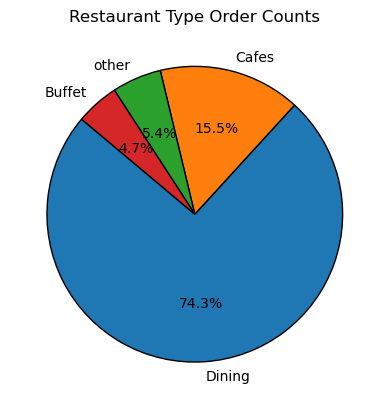

In [9]:
plt.pie(x=res_type,labels=res_type.index,autopct="%1.1f%%",startangle=140,wedgeprops={"edgecolor":"black"})
plt.title("Restaurant Type Order Counts")
plt.show()

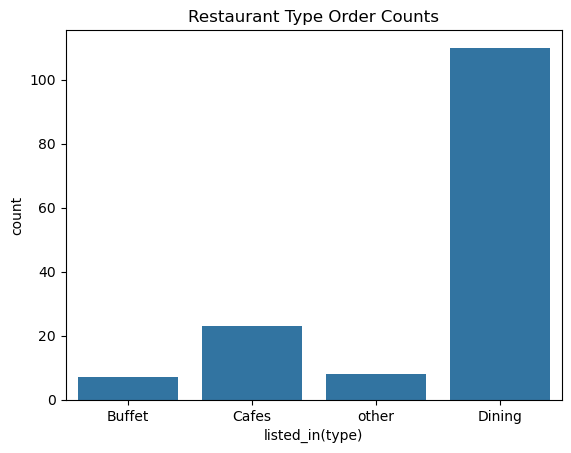

In [10]:
sns.countplot(data=df,x='listed_in(type)')
plt.title("Restaurant Type Order Counts")
plt.show()

# "কাস্টমাররা বেশিরভাগ কোন ধরণের রেস্টুরেন্ট থেকে অর্ডার করে?"
= >  Dining (74.4%)


# প্রতিটি ধরনের রেস্টুরেন্ট কতটি ভোট পেয়েছে গ্রাহকদের কাছ থেকে?

In [11]:
vote_count= df.pivot_table(index='listed_in(type)',values='votes',aggfunc='sum')

In [12]:
vote_count

,votes
listed_in(type),
Buffet,3028
Cafes,6434
Dining,20363
other,9367


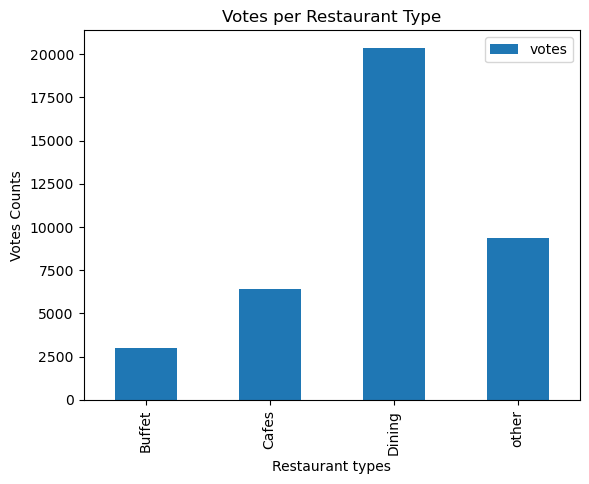

In [13]:
vote_count.plot(kind='bar')
plt.title("Votes per Restaurant Type")
plt.ylabel("Votes Counts")
plt.xlabel("Restaurant types")
plt.show()


# প্রতিটি ধরনের রেস্টুরেন্ট কতটি ভোট পেয়েছে গ্রাহকদের কাছ থেকে?

Buffet	3028 

Cafes	6434

Dining	20363

other	9367



# অধিকাংশ রেস্টুরেন্ট কি রেটিং পেয়েছে?

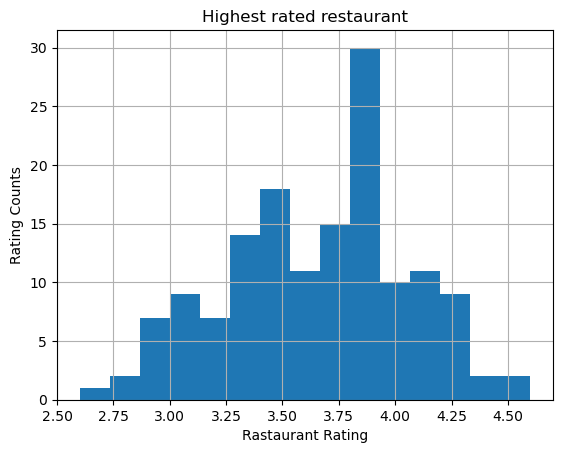

In [14]:
df['rate'].hist(bins=15)
plt.title("Highest rated restaurant")
plt.ylabel('Rating Counts')
plt.xlabel('Rastaurant Rating')
plt.show()

# অধিকাংশ রেস্টুরেন্ট কি রেটিং পেয়েছে?
3.40 - 4.00


# Zomato লক্ষ্য করেছে যে বেশিরভাগ যুগল তাদের খাবার অনলাইনে অর্ডার করে। তাদের প্রতি অর্ডারে গড় খরচ কত?

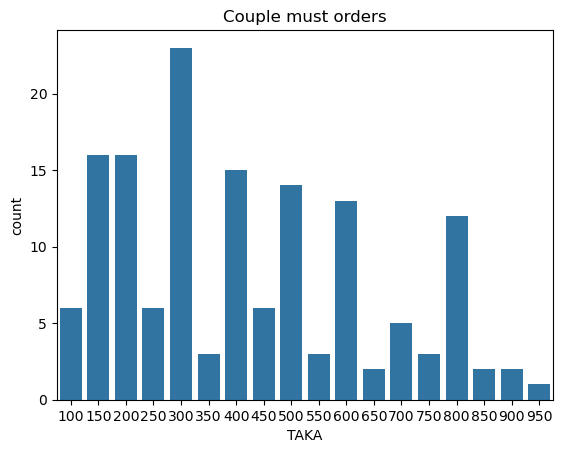

In [15]:
sns.countplot(data=df,x='approx_cost(for two people)')
plt.title("Couple must orders")
plt.xlabel('TAKA')
plt.show()

# Zomato লক্ষ্য করেছে যে বেশিরভাগ যুগল তাদের খাবার অনলাইনে অর্ডার করে। তাদের প্রতি অর্ডারে গড় খরচ কত?
300 tk


# কোন মোড (অনলাইন বা অফলাইন) সর্বাধিক রেটিং পেয়েছে?

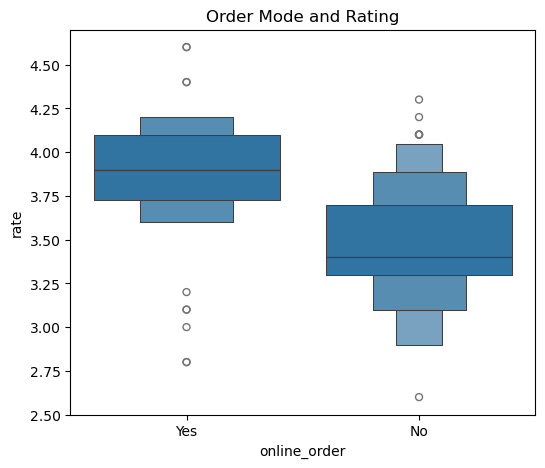

In [16]:
plt.figure(figsize=(6,5))
sns.boxenplot(data=df,x='online_order',y='rate',legend=True)
plt.title("Order Mode and Rating")
plt.show()

# কোন মোড (অনলাইন বা অফলাইন) সর্বাধিক রেটিং পেয়েছে?
Online mode (3.75-4.15)

# কোন ধরনের রেস্টুরেন্ট বেশি অফলাইন অর্ডার পেয়েছে, যাতে Zomato সেই গ্রাহকদের কিছু ভালো অফার দিতে পারে?

In [17]:
of_order_c= df.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)

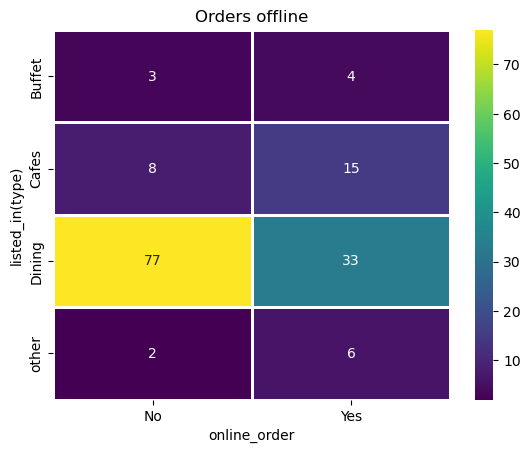

In [18]:
sns.heatmap(of_order_c,annot=True,fmt='0',cmap='viridis',linewidths=1)
plt.title("Orders offline")
plt.show()


# কোন ধরনের রেস্টুরেন্ট বেশি অফলাইন অর্ডার পেয়েছে, যাতে Zomato সেই গ্রাহকদের কিছু ভালো অফার দিতে পারে?
Dining (77)